In [1]:
%matplotlib inline
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect
from sqlalchemy import desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
ins=inspect(engine)
table=ins.get_table_names()

for i in table:
    print(i)
    column=ins.get_columns(i)
    for j in column:
        print(j)
#get_table_names

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoin

In [10]:
# Create our session (link) from Python to the DB
inspect=inspect(engine)
session = Session(engine)



# Exploratory Climate Analysis

In [11]:
#Design a query to retrieve the last 12 months of precipitation data and plot the results
inspect.get_table_names()
columns_measurement = inspect.get_columns('measurement')
for cols in columns_measurement:
    print(cols["name"],cols["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns_station = inspect.get_columns("station")
for cols in columns_station:
    print(cols["name"],cols["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
Result =session.execute("SELECT count(*) FROM measurement").fetchall()
print(Result)

Result = session.execute("SELECT count(*) FROM Measurement WHERE prcp is Null").fetchall()
print(Result)
Result = session.execute("SELECT count(*) FROM Station").fetchall()
print(Result)

Result = session.execute("SELECT count(*) FROM Measurement WHERE station is Null").fetchall()
print(Result)

Result = session.execute("SELECT count(*) FROM Measurement WHERE date is Null").fetchall()
print(Result)

Result = session.execute("SELECT count(*) FROM Measurement WHERE prcp is Null").fetchall()
print(Result)

Result = session.execute("SELECT count(*) FROM Measurement WHERE tobs is Null").fetchall()
print(Result)

Result = session.execute("SELECT count(*) FROM Station WHERE station is Null").fetchall()
print(Result)

Result = session.execute("SELECT count(*) FROM Station WHERE name is Null").fetchall()
print(Result)

Result = session.execute("SELECT count(*) FROM Station WHERE latitude is Null").fetchall()
print(Result)


Result = session.execute("SELECT count(*) FROM Station WHERE longitude is Null").fetchall()
print(Result)
session.execute("Update Measurement SET prcp=0.0 WHERE prcp is NULL")
session.commit()
Result = session.execute("SELECT count(*) FROM Measurement WHERE prcp is Null").fetchall()
print(Result)

[(19550,)]
[(0,)]
[(9,)]
[(0,)]
[(0,)]
[(0,)]
[(0,)]
[(0,)]
[(0,)]
[(0,)]
[(0,)]
[(0,)]


In [14]:
#Get the latest date
Latest_date = session.execute("SELECT MAX(date) FROM Measurement").fetchall()
#use session.query
Latest_date = session.query(func.max(measurement.date)).all()
#print(Latest_date)
End_Date = Latest_date[0][0]
print(End_Date)

2017-08-23


In [15]:
#Get the last 12 months
Struct = dt.date.today()
End_Date_dateformat = Struct.replace(year=int(End_Date[:4]),month=int(End_Date[5:7]),day=int(End_Date[8:]))
Last_date_year = End_Date_dateformat - dt.timedelta(days=365)    
Start_Date = Last_date_year.strftime("%Y-%m-%d")
print(Start_Date)

2016-08-23


In [16]:
print("date range is starting from{} and ending at{}".format(Start_Date,End_Date))

date range is starting from2016-08-23 and ending at2017-08-23


In [17]:
#Perform a query to get the precipitation data for 12 months
PRCP_data = session.query(measurement.date,measurement.prcp)\
                          .filter(measurement.date <= End_Date)\
                          .filter(measurement.date >= Start_Date)\
                          .order_by(measurement.date.desc()).all()

#Save the query results as a Pandas DataFrame and set the index to the date column
PRCP_data_DF = pd.DataFrame(PRCP_data).rename(columns={"date":"Date","prcp":"Precipitation Score"})
PRCP_data_DF.set_index("Date",inplace=True)
PRCP_data_DF.head()

,Precipitation Score
Date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


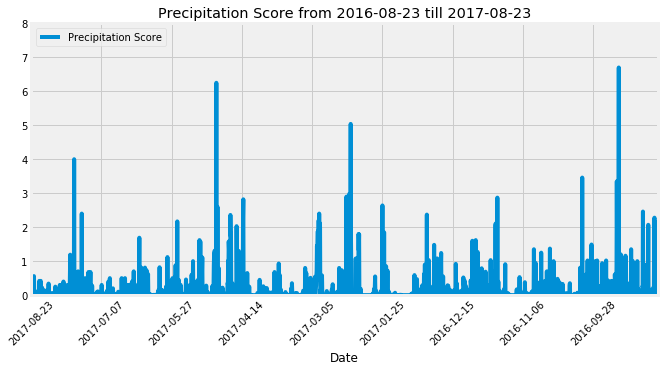

In [18]:
#Plot the results using the DataFrame plot method.
PRCP_data_DF.plot(figsize=(10,5),ylim=(0,8),title=f'Precipitation Score from {Start_Date} till {End_Date}',\
                  label="Precipitation",rot=45)
plt.legend(loc="upper left")
plt.savefig("Images/1_Precipitation_Analysis.jpg")
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
PRCP_data_DF.describe()

,Precipitation Score
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
Total_stations = session.query(Station).count()
print('Total number of stations is: {}'.format(Total_stations))

Total number of stations is: 9


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station))\
                                     .group_by(measurement.station)\
                                     .order_by((func.count(measurement.station))).all()
print("Rank\tStation ID\tObservations")
i = 1
for active_stations in active_stations:
    print("%d\t%s\t%d" %(i,active_stations[0],active_stations[1]))
    i+=1

Rank	Station ID	Observations
1	USC00518838	511
2	USC00517948	1372
3	USC00511918	1979
4	USC00514830	2202
5	USC00516128	2612
6	USC00519523	2669
7	USC00513117	2709
8	USC00519397	2724
9	USC00519281	2772


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
Station_Highest_Obs = session.query(measurement.station,func.count(measurement.station))\
                      .group_by(measurement.station)\
                      .order_by((func.count(measurement.station))).first()
#print("\n**Using session.query and concatenating strings for printing**")
#Station_Highest_Obs  
print("The station with the highest number of observation is "+str(Station_Highest_Obs[0])+" with " +\
      str(Station_Highest_Obs[1]) + " number of observations.")


The station with the highest number of observation is USC00518838 with 511 number of observations.


In [23]:
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs))\
                  .filter(measurement.station == Station_Highest_Obs[0]).all()


[(58.0, 83.0, 72.72407045009784)]

In [ ]:
#Query the last 12 months of temperature observation data for this station 
Results = session.query(measurement.date,measurement.station,measurement.tobs)\
             .filter(measurement.date >= Start_Date).filter(measurement.date<=End_Date)\
             .order_by(desc(measurement.date)).all()

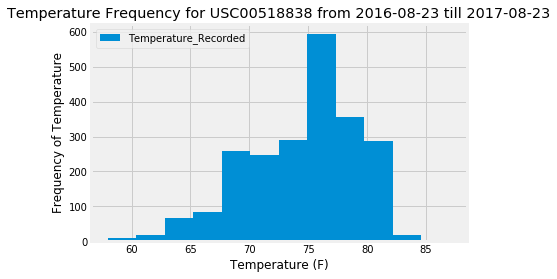

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Last12_tobs_DF = pd.DataFrame(Results,columns=["Date","Station ID","Temperature_Recorded"])
Last12_tobs_DF.head()
Last12_tobs_DF.plot.hist(by="Temperature_Recorded",bins=12,label="tobs",title=f'Temperature Frequency for {Station_Highest_Obs[0]} from {Start_Date} till {End_Date}')
plt.ylim=(0,80)
plt.ylabel("Frequency of Temperature")
plt.xlabel("Temperature (F)")
plt.legend=()
plt.savefig("Images/2_Temperature_Analysis.jpg")
plt.show()

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
Trip_start_date = input("Enter the trip start date in 'YYYY-MM-DD' format: ")
Trip_end_date = input("Enter the trip end date in 'YYYY-MM-DD' format: ")

In [ ]:
#Calculate the previous year's dates based on the input dates
Struct = dt.date.today()
Trip_start_date_dateformat = Struct.replace(year=int(Trip_start_date[:4]),month=int(Trip_start_date[5:7]),day=int(Trip_start_date[8:]))
Previous_Trip_start_date = Trip_start_date_dateformat - dt.timedelta(days=365)
Previous_Trip_start_date = Previous_Trip_start_date.strftime("%Y-%m-%d")
Previous_Trip_start_date
Trip_end_date_dateformat = Struct.replace(year=int(Trip_end_date[:4]),month=int(Trip_end_date[5:7]),day=int(Trip_end_date[8:]))
Previous_Trip_end_date = Trip_end_date_dateformat - dt.timedelta(days=365)
Previous_Trip_end_date = Previous_Trip_end_date.strftime("%Y-%m-%d")
Previous_Trip_end_date
Result = calc_temps(Previous_Trip_start_date, Previous_Trip_end_date)
print(Result)

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
#Step3: Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

tmin = Result[0][0]
tavg = Result[0][1]
tmax = Result[0][2]
y_err = tmax-tmin

plt.figure(figsize=(2,10))
plt.bar(0,tavg,yerr=y_err,align="center",width=1,color="orange",alpha=0.5)
plt.ylim=(0,120)
plt.ylabel("Temperature(F)")
plt.title("Trip Avg Temperature")
plt.savefig("Images/3_Trip_Avg_Temp_Analysis.jpg")
plt.show()


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
